# Intro to Univariate Volatility Forecasting with Arch

## Library Imports

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf 
from arch import arch_model
from arch.univariate import ARX, GARCH, StudentsT, SkewStudent, Normal
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Importing S&P 500 Data from 10 years back

In [3]:
sp_500 = yf.download("^GSPC", period="10y", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [4]:
sp_500_close = sp_500.Close
sp_500_close

Date
2014-09-18    2011.359985
2014-09-19    2010.400024
2014-09-22    1994.290039
2014-09-23    1982.770020
2014-09-24    1998.300049
                 ...     
2024-09-11    5554.129883
2024-09-12    5595.759766
2024-09-13    5626.020020
2024-09-16    5633.089844
2024-09-17    5634.580078
Name: Close, Length: 2516, dtype: float64

<Axes: xlabel='Date'>

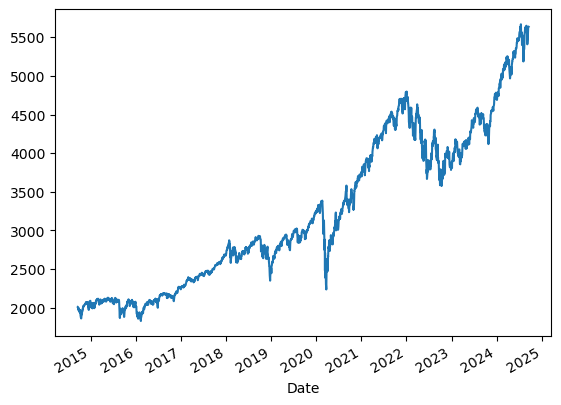

In [5]:
sp_500_close.plot.line()

## Calculate the log return

$ log\;return = ln(\frac{X_t}{X_{t-1}})$

In [6]:
sp_500_close_log_return = np.log(sp_500_close / sp_500_close.shift(1))

In [7]:
sp_500_close_log_return = sp_500_close_log_return.dropna()

<Axes: xlabel='Date'>

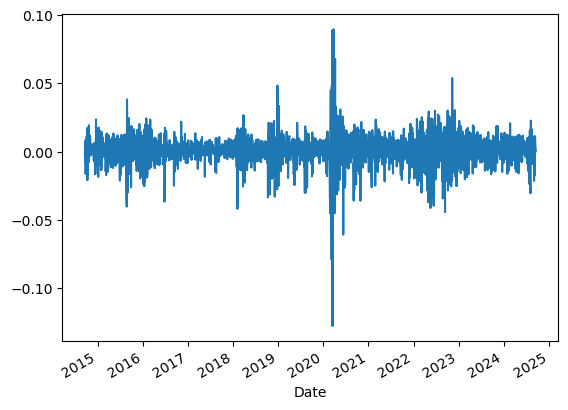

In [8]:
sp_500_close_log_return.plot.line()

## Default GARCH(1,1) Model With Constant Mean

mean model:  
$r_t = \mu + \epsilon_t$  
volatility model:  
$h_{t} = \sigma^{2}_{t} = \omega + \alpha\epsilon^{2}_{t-1} + \beta\sigma^{2}_{t-1}$  
$\epsilon_{t} = \sqrt{h_{t}}\epsilon_{t}, \; e_{t} \sim N(0,1)$  
Thus the model becomes:  
$r_t = \mu + \sqrt{h_{t}}\epsilon_{t}$

Note: Scaling Issues  
[1](https://quant.stackexchange.com/questions/50816/forecasting-volatility-using-garch-in-python-arch-package)  
[2](https://stats.stackexchange.com/questions/380174/do-parameters-stay-unchanged-when-garch-is-scaled)  
better to scale the return by multiplying with 100 to avoid convergence issues and rescale the forecast.  
  
Note: Annualizing Volatility  
[3](https://quantdare.com/annualizing-volatility/)  

In [9]:
am_constant = arch_model(sp_500_close_log_return, rescale=True)
res_constant = am_constant.fit(update_freq=5)

Iteration:      5,   Func. Count:     41,   Neg. LLF: 3235.4081861475343
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3229.4260410211787
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 8


In [10]:
res_constant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3229.43
Distribution:                  Normal   AIC:                           6466.85
Method:            Maximum Likelihood   BIC:                           6490.17
                                        No. Observations:                 2515
Date:                Wed, Sep 18 2024   Df Residuals:                     2514
Time:                        09:51:23   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0812  1.481e-02      5.479  4.274e-08 [5.213e-02,  0.110]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0385  9.896e-03      3.886  1.018e-04 [1.906e-02,5.785e-02]
alpha[1]       0.1942  2.981e-02      6.516  7.227e-11     [  0.136,  0.253]
beta[1]        0.7782  2.786e-02     27.931 1.136e-171     [  0.724,  0.833]
============================================================================

Covariance estimator: robust
"""

In [11]:
res_constant.scale

100.0

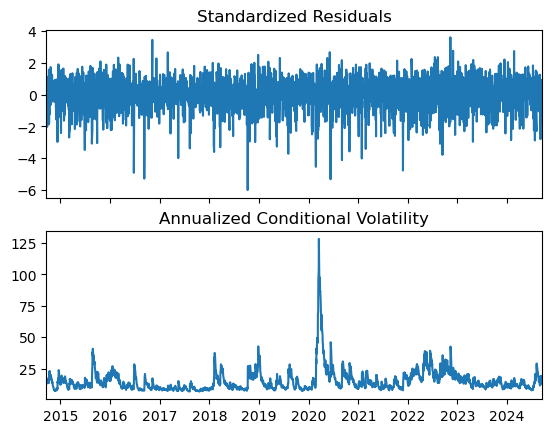

In [12]:
fig_constant = res_constant.plot(annualize="D")

## Garch Model with Autoregressive Mean and T-distributed Residuals

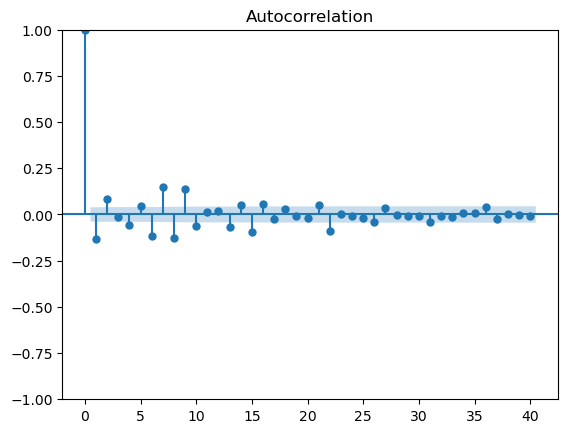

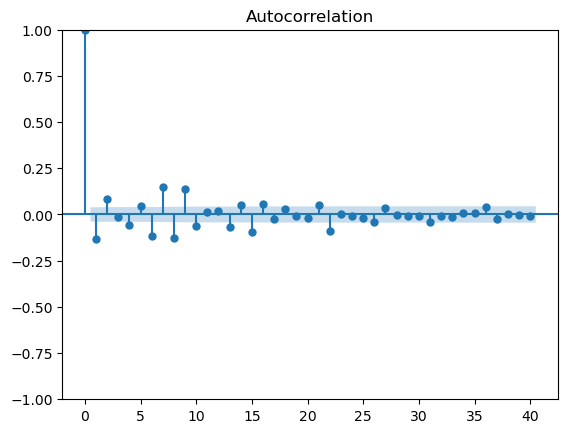

In [13]:
plot_acf(sp_500_close_log_return, lags=40)

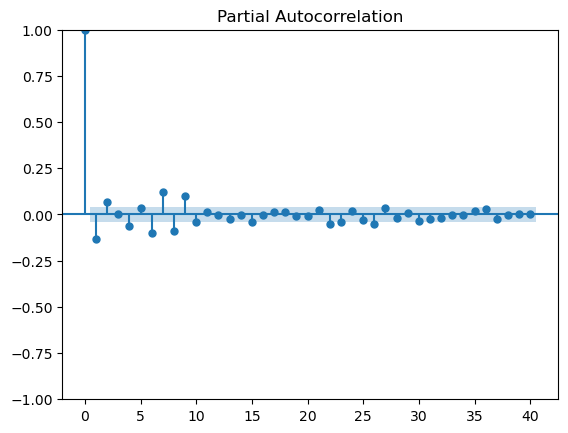

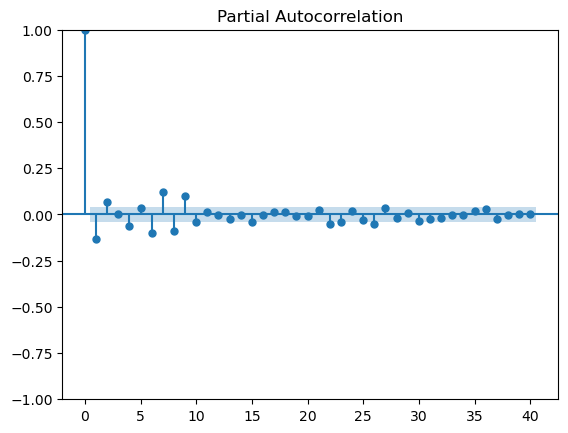

In [14]:
plot_pacf(sp_500_close_log_return, lags=40)

In [15]:
ar_gjr_studentT = ARX(sp_500_close_log_return, lags=[1], rescale=True)
ar_gjr_studentT

AR(constant: yes, lags: 1, no. of exog: 0, volatility: Constant Variance, distribution: Normal distribution), id: 0x2b4d8bcd4f0

In [16]:
ar_gjr_studentT.volatility = GARCH(p=1, o=1, q=1)
ar_gjr_studentT.distribution = StudentsT()
res_gjr_studentT = ar_gjr_studentT.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 43611.994820831285
Iteration:      2,   Func. Count:     23,   Neg. LLF: 133560.0097942957
Iteration:      3,   Func. Count:     35,   Neg. LLF: 35323.95105182853
Iteration:      4,   Func. Count:     45,   Neg. LLF: 3902.0711074534092
Iteration:      5,   Func. Count:     55,   Neg. LLF: 3276.725852563023
Iteration:      6,   Func. Count:     64,   Neg. LLF: 3116.5396304301485
Iteration:      7,   Func. Count:     73,   Neg. LLF: 6104.129054430603
Iteration:      8,   Func. Count:     83,   Neg. LLF: 3114.1691674636804
Iteration:      9,   Func. Count:     92,   Neg. LLF: 3118.8883182594177
Iteration:     10,   Func. Count:    102,   Neg. LLF: 3113.2748949912398
Iteration:     11,   Func. Count:    111,   Neg. LLF: 3113.058063967552
Iteration:     12,   Func. Count:    120,   Neg. LLF: 3113.0553487452385
Iteration:     13,   Func. Count:    128,   Neg. LLF: 3113.055308783505
Iteration:     14,   Func. Count:    135,   Neg. LLF: 311

In [17]:
res_gjr_studentT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AR - GJR-GARCH Model Results                            
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.008
Mean Model:                              AR   Adj. R-squared:                  0.007
Vol Model:                        GJR-GARCH   Log-Likelihood:               -3113.06
Distribution:      Standardized Student's t   AIC:                           6240.11
Method:                  Maximum Likelihood   BIC:                           6280.92
                                              No. Observations:                 2514
Date:                      Wed, Sep 18 2024   Df Residuals:                     2512
Time:                              09:51:24   Df Model:                            2
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0706  1.310e-02      5.388  7.108e-08  [4.491e-02,9.625e-02]
Close[1]      -0.0358  2.062e-02     -1.736  8.248e-02 [-7.623e-02,4.609e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0252  5.274e-03      4.774  1.807e-06  [1.484e-02,3.551e-02]
alpha[1]       0.0190  1.684e-02      1.128      0.259 [-1.400e-02,5.200e-02]
gamma[1]       0.2809  4.487e-02      6.261  3.834e-10      [  0.193,  0.369]
beta[1]        0.8243  1.978e-02     41.679      0.000      [  0.786,  0.863]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             6.0432      0.760      7.952  1.840e-15 [  4.554,  7.533]
========================================================================

Covariance estimator: robust
"""

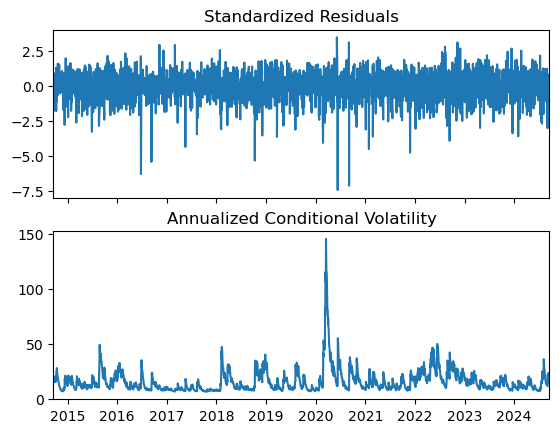

In [18]:
fig_gjr_studentT = res_gjr_studentT.plot(annualize="D")

## GJR-GARCH Model with Autoregressive Mean and Skew T distribution

In [19]:
ar_gjr_skewstudent = ARX(sp_500_close_log_return, lags=[1], rescale=True)
ar_gjr_skewstudent.volatility = GARCH(p=1, o=1, q=1)
ar_gjr_skewstudent.distribution = SkewStudent()
res_gjr_skewstudent = ar_gjr_skewstudent.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 56791.019643226406
Iteration:      2,   Func. Count:     25,   Neg. LLF: 348361.2027887297
Iteration:      3,   Func. Count:     38,   Neg. LLF: 177718.32017276593
Iteration:      4,   Func. Count:     49,   Neg. LLF: 95774.69323631676
Iteration:      5,   Func. Count:     60,   Neg. LLF: 101781.78578320786
Iteration:      6,   Func. Count:     70,   Neg. LLF: 4694.780116655646
Iteration:      7,   Func. Count:     80,   Neg. LLF: 3108.655169885874
Iteration:      8,   Func. Count:     90,   Neg. LLF: 6799.06024427135
Iteration:      9,   Func. Count:    101,   Neg. LLF: 3119.644889747923
Iteration:     10,   Func. Count:    111,   Neg. LLF: 3118.6221319220813
Iteration:     11,   Func. Count:    122,   Neg. LLF: 3103.5011697177174
Iteration:     12,   Func. Count:    132,   Neg. LLF: 3116.423902281162
Iteration:     13,   Func. Count:    143,   Neg. LLF: 3173.7334018571432
Iteration:     14,   Func. Count:    154,   Neg. LLF: 3099.

In [20]:
res_gjr_skewstudent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR - GJR-GARCH Model Results                              
=========================================================================================
Dep. Variable:                             Close   R-squared:                       0.010
Mean Model:                                   AR   Adj. R-squared:                  0.010
Vol Model:                             GJR-GARCH   Log-Likelihood:               -3099.85
Distribution:      Standardized Skew Student's t   AIC:                           6215.71
Method:                       Maximum Likelihood   BIC:                           6262.34
                                                   No. Observations:                 2514
Date:                           Wed, Sep 18 2024   Df Residuals:                     2512
Time:                                   09:51:24   Df Model:                            2
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0494  1.402e-02      3.522  4.283e-04   [2.190e-02,7.686e-02]
Close[1]      -0.0464  2.135e-02     -2.175  2.962e-02 [-8.830e-02,-4.594e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0256  5.221e-03      4.896  9.758e-07  [1.533e-02,3.580e-02]
alpha[1]       0.0211  1.638e-02      1.291      0.197 [-1.096e-02,5.324e-02]
gamma[1]       0.2736  4.403e-02      6.214  5.172e-10      [  0.187,  0.360]
beta[1]        0.8266  1.940e-02     42.614      0.000      [  0.789,  0.865]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
eta            6.9491      0.979      7.098  1.262e-12    [  5.030,  8.868]
lambda        -0.1500  3.002e-02     -4.997  5.813e-07 [ -0.209,-9.118e-02]
===========================================================================

Covariance estimator: robust
"""

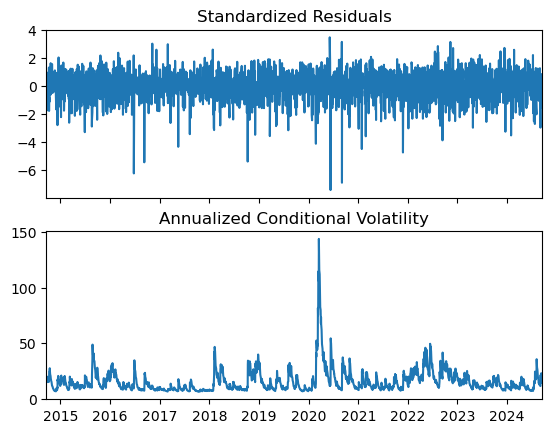

In [21]:
fig_gjr_skewstudent = res_gjr_skewstudent.plot(annualize="D")

## GJR-Garch Model with Autoregressive Mean and Normal Residuals

In [22]:
ar_gjr_normal = ARX(sp_500_close_log_return, lags=[1], rescale=True)
ar_gjr_normal.volatility = GARCH(p=1, o=1, q=1)
ar_gjr_normal.distribution = Normal()
res_gjr_normal = ar_gjr_normal.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 257287.68162847654
Iteration:      2,   Func. Count:     19,   Neg. LLF: 31701794887702.945
Iteration:      3,   Func. Count:     30,   Neg. LLF: 349546.5053284514
Iteration:      4,   Func. Count:     42,   Neg. LLF: 5639.512733337114
Iteration:      5,   Func. Count:     51,   Neg. LLF: 3979.03061460886
Iteration:      6,   Func. Count:     60,   Neg. LLF: 4122.137363046471
Iteration:      7,   Func. Count:     69,   Neg. LLF: 3198.887751076816
Iteration:      8,   Func. Count:     77,   Neg. LLF: 3197.009020058471
Iteration:      9,   Func. Count:     85,   Neg. LLF: 3193.481188255359
Iteration:     10,   Func. Count:     92,   Neg. LLF: 3193.4810907448536
Iteration:     11,   Func. Count:     99,   Neg. LLF: 3193.481088342949
Iteration:     12,   Func. Count:    105,   Neg. LLF: 3193.4810883432483
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3193.481088342949
            Iterations: 1

In [23]:
res_gjr_normal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         AR - GJR-GARCH Model Results                         
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.012
Mean Model:                        AR   Adj. R-squared:                  0.012
Vol Model:                  GJR-GARCH   Log-Likelihood:               -3193.48
Distribution:                  Normal   AIC:                           6398.96
Method:            Maximum Likelihood   BIC:                           6433.94
                                        No. Observations:                 2514
Date:                Wed, Sep 18 2024   Df Residuals:                     2512
Time:                        09:51:25   Df Model:                            2
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0540  1.446e-02      3.735  1.874e-04 [2.567e-02,8.236e-02]
Close[1]      -0.0570  2.433e-02     -2.340  1.926e-02  [ -0.105,-9.259e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0374  8.668e-03      4.312  1.617e-05 [2.039e-02,5.436e-02]
alpha[1]       0.0703  3.755e-02      1.873  6.111e-02  [-3.276e-03,  0.144]
gamma[1]       0.2208  4.881e-02      4.523  6.092e-06     [  0.125,  0.316]
beta[1]        0.7897  3.030e-02     26.060 1.045e-149     [  0.730,  0.849]
============================================================================

Covariance estimator: robust
"""

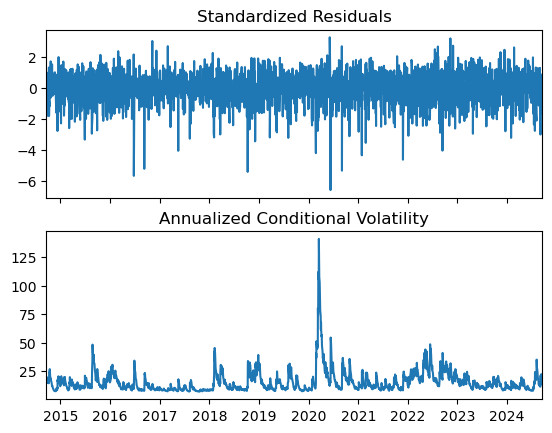

In [24]:
fig_gjr_normal = res_gjr_normal.plot(annualize="D")

## Comparing Model using AIC

When using AIC to compare model, lower is better.

In [25]:
res_constant.aic

6466.852082042357

In [26]:
res_gjr_normal.aic

6398.962176685898

In [27]:
res_gjr_skewstudent.aic

6215.705360883575

In [28]:
res_gjr_studentT.aic

6240.11061756701

The scale of the model (as all the model is rescaled).

In [29]:
res_constant.scale

100.0

In [30]:
res_gjr_normal.scale

100.0

In [31]:
res_gjr_skewstudent.scale

100.0

In [32]:
res_gjr_studentT.scale

100.0

The best model is a GARCH(1,1) model with skew student T residuals and autoregressive mean.  

## Forecasting Volatility

Analytical Forecast: Available for Most Models That Evolve In Terms of The Squares of The Residuals.  
exploits the relationship $\alpha E_{t}[\epsilon^{2}_{t+1}] = \sigma^{2}_{t+1}$

$\sigma^{2}_{t+1} = \omega + \alpha\epsilon^{2}_{t} + \beta\sigma^{2}_{t}$  
$\sigma^{2}_{t+1} = \omega + \alpha E_{t}[\epsilon^{2}_{t+h-1}] + \beta E_{t}[\sigma^{2}_{t+h-1}] \; h\geq2$  
$\sigma^{2}_{t+1} = \omega + (\alpha + \beta)E_{t}[\sigma^{2}_{t+h-1}] \; h\geq2$

Example of forecasting volatility 30 day forward.  

In [33]:
forecast_30 = res_gjr_skewstudent.forecast(horizon=30)
forecast_30

In [34]:
forecast_30.variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-17,0.690384,0.706759,0.721449,0.735909,0.750145,0.764162,0.777961,0.791547,0.804923,0.818092,...,0.950175,0.961097,0.97185,0.982437,0.99286,1.003122,1.013225,1.023172,1.032965,1.042606


Now, we rescale the volatility, note that in GARCH $r_{t} = \mu + \sqrt{h_{t}} \epsilon_{t}$ and we scale our return data $r_{t} \times 100$ for convergence purposes, to get the variance in the real scale we must calculate $r_{t \; rescaled} = \frac{r_{t}}{scale^{2}}$  

In [35]:
forecast_30_variance_rescaled = forecast_30.variance / np.power(res_gjr_skewstudent.scale, 2)

In [36]:
forecast_30_variance_rescaled

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.21,h.22,h.23,h.24,h.25,h.26,h.27,h.28,h.29,h.30
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-17,0.000069,0.000071,0.000072,0.000074,0.000075,0.000076,0.000078,0.000079,0.00008,0.000082,...,0.000095,0.000096,0.000097,0.000098,0.000099,0.0001,0.000101,0.000102,0.000103,0.000104


In [37]:
forecast_30_variance_rescaled = forecast_30_variance_rescaled.transpose()
forecast_30_variance_rescaled

Date,2024-09-17
h.01,0.000069
h.02,0.000071
h.03,0.000072
h.04,0.000074
h.05,0.000075
h.06,0.000076
h.07,0.000078
h.08,0.000079
h.09,0.000080
h.10,0.000082


In [38]:
forecast_30_stddev = np.sqrt(forecast_30_variance_rescaled)
forecast_30_stddev

Date,2024-09-17
h.01,0.008309
h.02,0.008407
h.03,0.008494
h.04,0.008579
h.05,0.008661
h.06,0.008742
h.07,0.008820
h.08,0.008897
h.09,0.008972
h.10,0.009045


In [39]:
forecast_30_stddev_annualized = forecast_30_stddev * np.sqrt(252)
forecast_30_stddev_annualized

Date,2024-09-17
h.01,0.131900
h.02,0.133455
h.03,0.134835
h.04,0.136180
h.05,0.137491
h.06,0.138769
h.07,0.140016
h.08,0.141234
h.09,0.142422
h.10,0.143582
